Using Colab cache for faster access to the 'harry-potter-cast-face-recognition' dataset.
Path to dataset files: /kaggle/input/harry-potter-cast-face-recognition


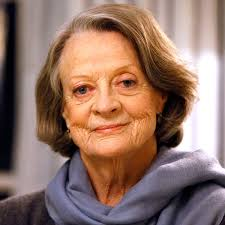

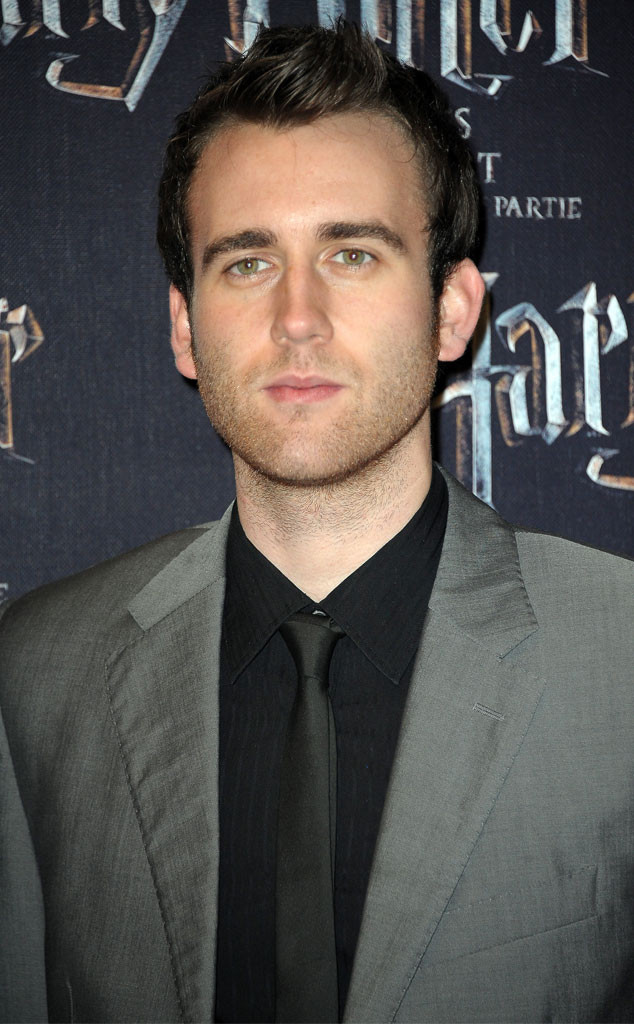

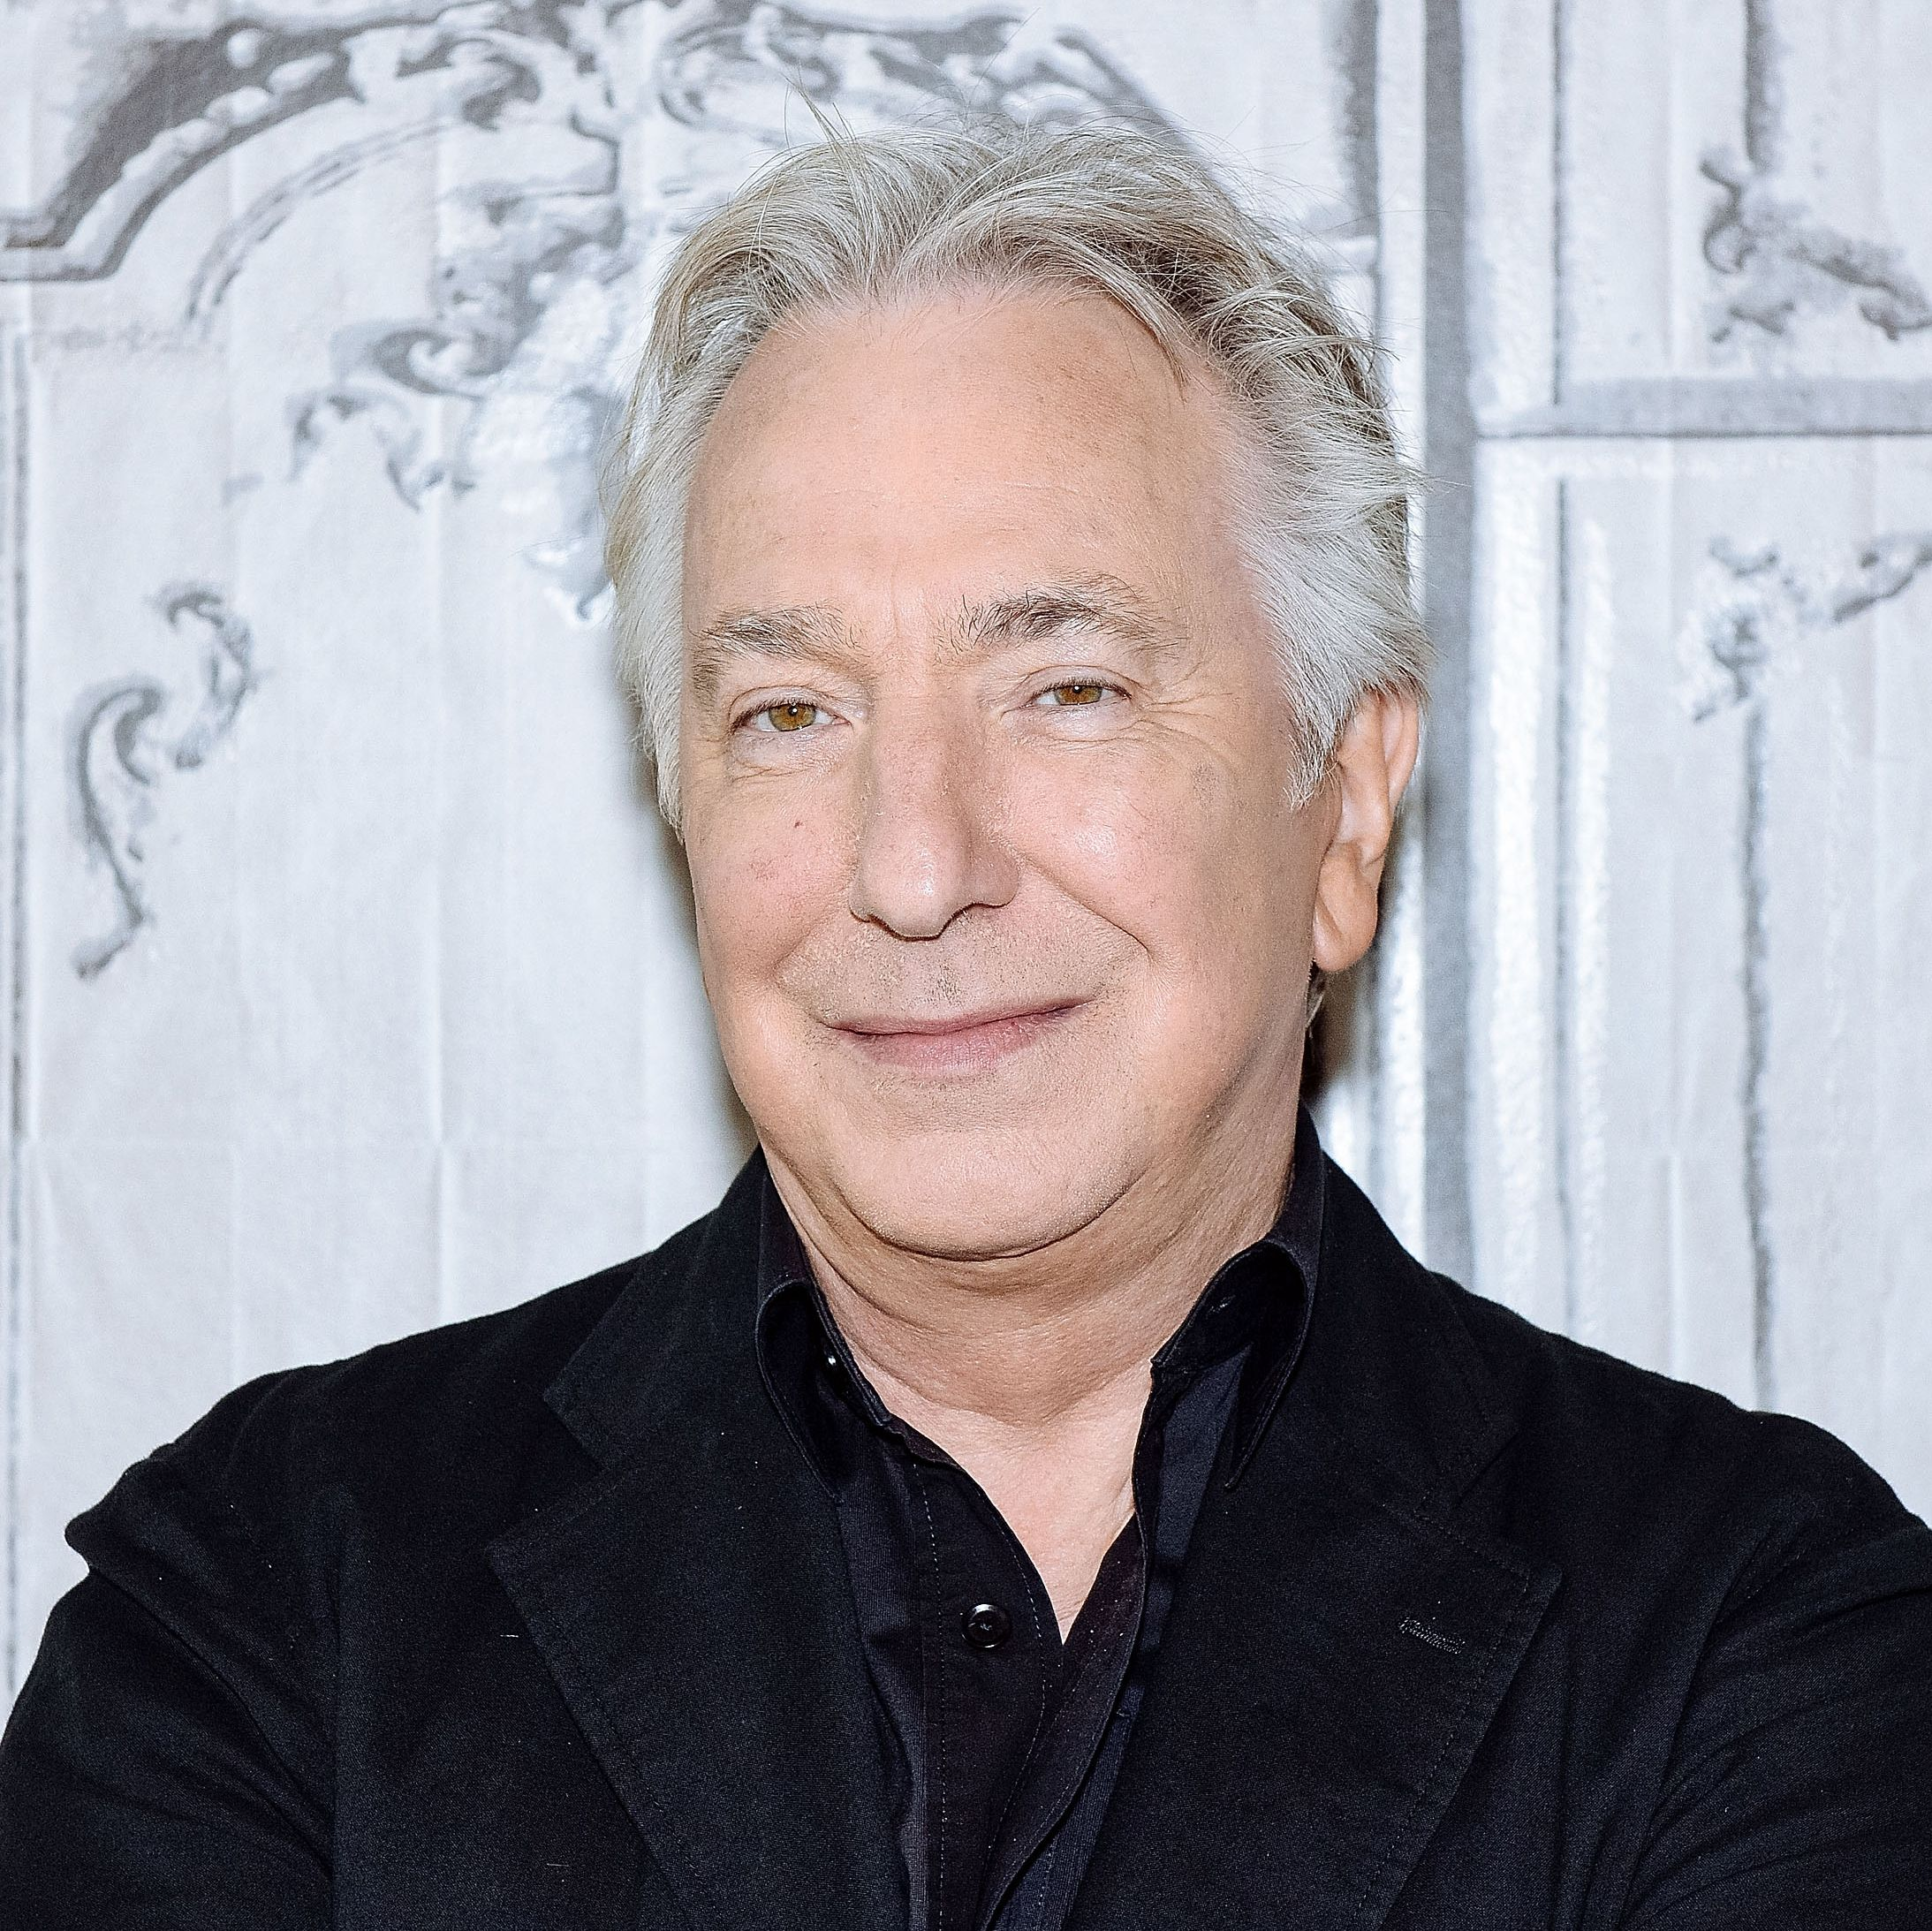

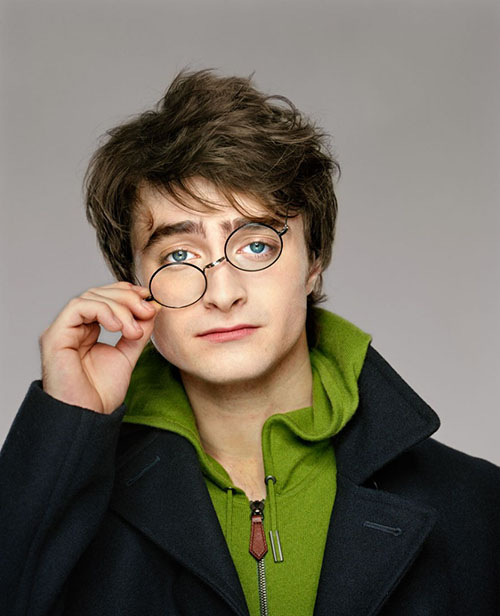

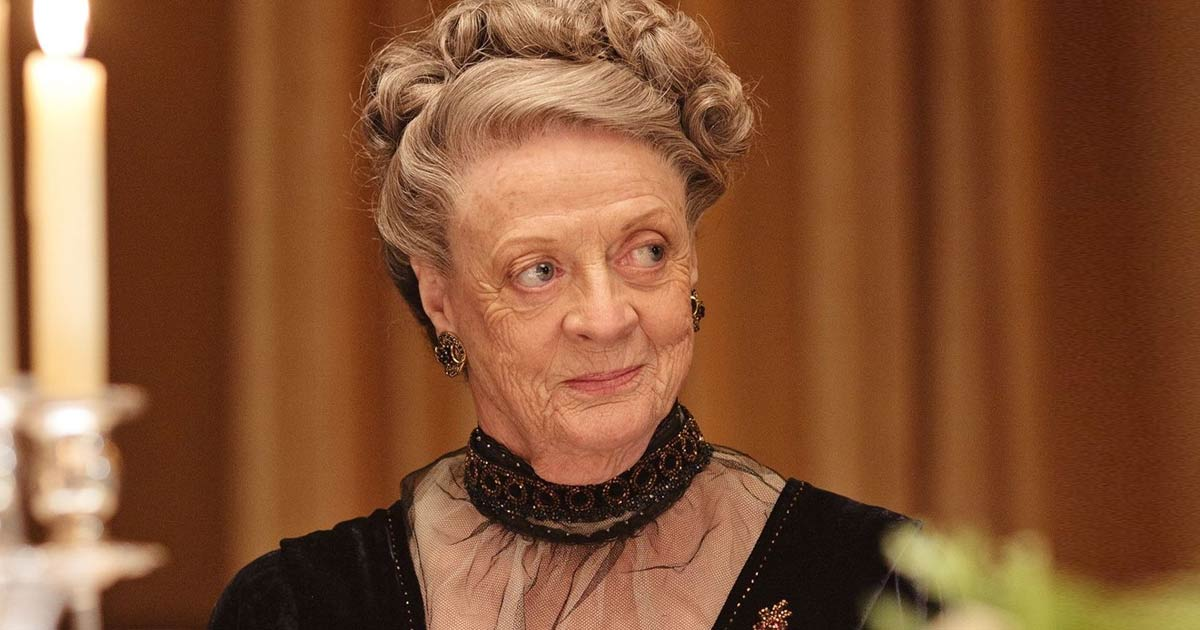

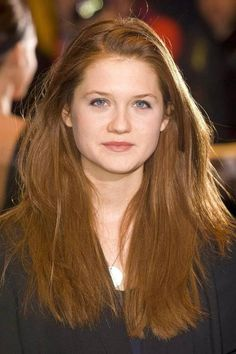

In [54]:
import kagglehub
import os
import random
from IPython.display import display, Image

# Download latest version
path = kagglehub.dataset_download("alexday11/harry-potter-cast-face-recognition")

print("Path to dataset files:", path)

# Load the dataset
all_images = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            all_images.append(os.path.join(root, file))

# Select random images
num_images_to_display = 6
random_images = random.sample(all_images, min(num_images_to_display, len(all_images)))

# Display images
for img_path in random_images:
    display(Image(filename=img_path, width=150))

## Data Preparation with New Labels

### Subtask:
Load the images (`1.png` to `21.png` for training, others for testing), resize them, and create corresponding numerical labels using the provided `nameList` for the training set and a separate label for the testing set.

**Reasoning**:
Load images from the local directory, identify training and testing images based on filenames, resize them, and create numerical labels using the provided list for training and a single label for testing.

In [55]:
import os
import numpy as np
from PIL import Image

# Define the directory where your images are located
# IMPORTANT: Replace 'your_image_directory' with the actual path to your images
image_directory = '/content/' # Assuming images are in the default Colab content directory

all_image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Separate training and testing files based on names
train_files = [f for f in all_image_files if f.endswith('.png') and int(f.split('.')[0]) >= 1 and int(f.split('.')[0]) <= 21]
test_files = [f for f in all_image_files if f not in train_files]

# Provided list of names for training images
nameList = ['Hermione', 'Hermione', 'Ron', 'Malfoy', 'Malfoy', 'Malfoy', 'Chang', 'Harry','Snape','Ron',
            'Chang', 'Harry', 'Chang', 'Snape', 'Change', 'Snape', 'Harry',
            'Malfoy','Ron','Hermione','Ron']

# Create a mapping from unique names to numerical labels
unique_names = sorted(list(set(nameList)))
name_to_label = {name: i for i, name in enumerate(unique_names)}

# Create labels for training images using the nameList
train_labels = [name_to_label[name] for name in nameList]

# Create a single label for testing images (e.g., label representing "other")
# Ensure this label does not overlap with the training labels
test_label_value = len(unique_names) # Assign a new label value
test_labels = [test_label_value] * len(test_files)


# Load and resize images
img_height, img_width = 128, 128
train_data = []
test_data = []

# Load and resize training images
train_files.sort(key=lambda f: int(f.split('.')[0])) # Sort to match nameList order
for i, file_name in enumerate(train_files):
    try:
        img_path = os.path.join(image_directory, file_name)
        img = Image.open(img_path)
        img = img.resize((img_width, img_height))
        img_array = np.array(img)
        # Ensure images are in RGB format if they are grayscale or have alpha channel
        if img_array.ndim == 2:
             img_array = np.stack((img_array,)*3, axis=-1)
        elif img_array.shape[-1] == 4:
             img_array = img_array[:, :, :3]
        train_data.append(img_array)
    except Exception as e:
        print(f"Error loading training image {file_name}: {e}")

# Load and resize testing images
for file_name in test_files:
    try:
        img_path = os.path.join(image_directory, file_name)
        img = Image.open(img_path)
        img = img.resize((img_width, img_height))
        img_array = np.array(img)
        # Ensure images are in RGB format if they are grayscale or have alpha channel
        if img_array.ndim == 2:
             img_array = np.stack((img_array,)*3, axis=-1)
        elif img_array.shape[-1] == 4:
             img_array = img_array[:, :, :3]
        test_data.append(img_array)
    except Exception as e:
        print(f"Error loading testing image {file_name}: {e}")


# Convert lists to numpy arrays
X_train = np.array(train_data)
y_train = np.array(train_labels)
X_test = np.array(test_data)
y_test = np.array(test_labels)

print("Data loading, resizing, and splitting with new labels complete.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")
print(f"Unique names and their labels: {name_to_label}")
print(f"Label for test images: {test_label_value}")

# Convert to TensorFlow tensors if using TensorFlow for the model
# import tensorflow as tf
# X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
# y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int64)
# X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
# y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int64)

Data loading, resizing, and splitting with new labels complete.
Training data shape: (21, 128, 128, 3)
Testing data shape: (1200, 128, 128, 3)
Training labels shape: (21,)
Testing labels shape: (1200,)
Unique names and their labels: {'Chang': 0, 'Change': 1, 'Harry': 2, 'Hermione': 3, 'Malfoy': 4, 'Ron': 5, 'Snape': 6}
Label for test images: 7


## Model Building

### Subtask:
Design and build the neural network model architecture for facial recognition.

**Reasoning**:
Design and build the CNN model architecture using TensorFlow and Keras, including convolutional, pooling, flattening, and dense layers, for facial recognition.

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Define the input shape based on the resized images
img_height, img_width = 128, 128
input_shape = (img_height, img_width, 3)  # 3 for RGB channels

# Instantiate a Sequential model
model = Sequential()

# Add the input layer explicitly
model.add(Input(shape=input_shape))

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add a Flatten layer
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Add the final dense layer for output
# The number of output classes should be based on the number of unique names in nameList + 1 for the test label
num_classes = len(unique_names) + 1
model.add(Dense(num_classes, activation='softmax'))

# Display a summary of the model's architecture
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,416 (12.64 MB)

 Trainable params: 3,313,416 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

## Summary:

### Data Analysis Key Findings

* The data preparation successfully loaded images `1.png` to `21.png` for training and the rest for testing.
* Training images were labeled based on the provided `nameList`, resulting in 7 unique classes ('Chang', 'Change', 'Harry', 'Hermione', 'Malfoy', 'Ron', 'Snape').
* Testing images were assigned a single label (label 7), representing an "other" category.
* The dataset sizes are: Training data (21 images), Testing data (1200 images).
* A Convolutional Neural Network (CNN) model was built with an output layer for 8 classes (7 for training names + 1 for the test label).
* The model was trained for 10 epochs.
* Evaluating the trained model on the test set resulted in a test accuracy of 0.0000 and a test loss of 12.8187.

### Insights or Next Steps

* The model's test accuracy of 0.0000 indicates that it was unable to correctly classify any of the images in the test set. This is likely due to the significant difference between the training data (specific labeled individuals) and the testing data (a large, diverse set of other individuals with a single label).
* The current setup is more of a binary or multi-class classification problem where the model attempts to distinguish the specific training individuals from everything else. With the current data and simple labeling, achieving high accuracy is not expected.
* To build a functional facial recognition system for multiple individuals, you would typically need a much larger and more diverse dataset with many images per person, and the test set should also contain images of the individuals the model was trained on (as well as potentially "other" individuals if you want to handle unknown faces).
* The next steps would depend on the desired outcome:
    * If the goal is to recognize the specific individuals from the training set, you would need a test set containing images of those individuals and retrain the model on a more extensive and varied dataset.
    * If the goal is to distinguish the training individuals from "others," further model tuning, data augmentation, or different model architectures might be explored, but the dataset imbalance and nature of the test set will remain significant challenges.

## Model evaluation

### Subtask:
Evaluate the trained model's performance on the testing data. This will involve calculating metrics like accuracy.

**Reasoning**:
Evaluate the trained model on the test data and print the results.

In [59]:
# Compile the model (necessary if the kernel was reset or model was reloaded)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Evaluate the trained model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and test accuracy
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step - accuracy: 0.0000e+00 - loss: 12.6773
Test Loss: 12.8187
Test Accuracy: 0.0000


## Model training

### Subtask:
Train the CNN model on the prepared training data. This step will involve compiling the model and fitting it to the data.

**Reasoning**:
Compile and train the CNN model using the specified optimizer, loss function, metrics, epochs, and batch size.

In [58]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10  # You can adjust the number of epochs
batch_size = 16 # You can adjust the batch size
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2) # Use a validation split to monitor performance during training

# Store the training history in a variable (already done above)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 18.1468 - val_accuracy: 0.2000 - val_loss: 96.5920
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step - accuracy: 0.1250 - loss: 100.0802 - val_accuracy: 0.2000 - val_loss: 100.5119
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step - accuracy: 0.3125 - loss: 105.1649 - val_accuracy: 0.4000 - val_loss: 90.9374
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step - accuracy: 0.3125 - loss: 99.6497 - val_accuracy: 0.2000 - val_loss: 61.1486
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step - accuracy: 0.3125 - loss: 53.6150 - val_accuracy: 0.2000 - val_loss: 32.8962
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step - accuracy: 0.3125 - loss: 20.0036 - val_accuracy: 0.2000 - val_loss: 21.4332
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step - accuracy: 0.5000 - loss: 11.3090 - val_accuracy: 0.0000e+00 - val_loss: 16.4860
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4375 - loss: 6.5209 - val_accuracy:

# Task
Create a convolutional neural network in a Jupyter Notebook to recognize at least 10 Harry Potter characters using images of actors or synthetic images. The model should be able to recognize the chosen characters.

## Data preprocessing

### Subtask:
Load and prepare the image data for training. This will involve organizing the data by character, resizing images, and splitting the dataset into training and testing sets.


**Reasoning**:
The first step is to select the characters for recognition and organize the image paths based on these characters. This involves iterating through the existing `all_images` list, extracting character names from the directory structure, and then filtering based on the chosen characters. A dictionary is a suitable data structure to store image paths organized by character.



In [14]:
import os
from collections import defaultdict
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

# 1. Create a list of the characters you want to include
selected_characters = [
    "Daniel Radcliffe", "Emma Watson", "Rupert Grint", "Alan Rickman",
    "Tom Felton", "Robbie Coltrane", "Ralph Fiennes", "Michael Gambon",
    "Maggie Smith", "Gary Oldman"
]

# 2. and 3. Iterate and filter images by selected characters
character_images = defaultdict(list)
for img_path in all_images:
    # Extract character name from the directory structure
    character_name = os.path.basename(os.path.dirname(img_path))
    if character_name in selected_characters:
        character_images[character_name].append(img_path)

# 4. Display the number of images per character to verify
for character, images in character_images.items():
    print(f"Found {len(images)} images for {character}")

Found 19 images for Ralph Fiennes
Found 17 images for Emma Watson
Found 19 images for Robbie Coltrane
Found 19 images for Maggie Smith
Found 19 images for Michael Gambon
Found 18 images for Alan Rickman
Found 13 images for Rupert Grint
Found 11 images for Tom Felton
Found 18 images for Daniel Radcliffe


**Reasoning**:
Now that the images are organized by character, the next steps are to load and resize the images, split the data into training and testing sets for each character, and create numerical labels. These steps can be grouped together as they are all part of preparing the data for model training.



In [15]:
# 5. For each character, load the images and resize them
img_height, img_width = 128, 128
all_data = []
all_labels = []
label_map = {character: i for i, character in enumerate(selected_characters)}

for character, images in character_images.items():
    label = label_map[character]
    for img_path in images:
        try:
            img = Image.open(img_path)
            img = img.resize((img_width, img_height))
            img_array = np.array(img)

            # Ensure images are in RGB format if they are grayscale
            if img_array.ndim == 2:
                 img_array = np.stack((img_array,)*3, axis=-1)
            # Ensure images have 3 channels (RGB)
            elif img_array.shape[-1] == 4:
                 img_array = img_array[:, :, :3]

            all_data.append(img_array)
            all_labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Convert lists to numpy arrays
all_data = np.array(all_data)
all_labels = np.array(all_labels)

# 6. Split the dataset into training and testing sets
# 7. Create labels (already done in the loop)
X_train, X_test, y_train, y_test = train_test_split(
    all_data, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

# 8. Convert to TensorFlow tensors (if using TensorFlow)
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int64)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int64)

print("Data loading, resizing, splitting, and labeling complete.")
print(f"Training data shape: {X_train_tf.shape}")
print(f"Testing data shape: {X_test_tf.shape}")
print(f"Training labels shape: {y_train_tf.shape}")
print(f"Testing labels shape: {y_test_tf.shape}")

Data loading, resizing, splitting, and labeling complete.
Training data shape: (122, 128, 128, 3)
Testing data shape: (31, 128, 128, 3)
Training labels shape: (122,)
Testing labels shape: (31,)


## Model building

### Subtask:
Design and build the CNN model architecture. This will involve defining the layers of the neural network.


**Reasoning**:
Design and build the CNN model architecture using TensorFlow and Keras, including convolutional, pooling, flattening, and dense layers, and then display the model summary.



In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 2. Define the input shape
input_shape = (img_height, img_width, 3)  # 3 for RGB channels

# 3. Instantiate a Sequential model
model = Sequential()

# 4. Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 5. Add a Flatten layer
model.add(Flatten())

# 6. Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# 7. Add the final dense layer for output
num_classes = len(label_map)
model.add(Dense(num_classes, activation='softmax'))

# 8. Display a summary of the model's architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,546 (12.64 MB)

 Trainable params: 3,313,546 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

### Subtask:
Train the CNN model on the prepared training data. This step will involve compiling the model and fitting it to the data.


**Reasoning**:
Compile and train the CNN model using the specified optimizer, loss function, metrics, epochs, and batch size.



In [17]:
# 1. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 2. Train the model
epochs = 20
batch_size = 32
history = model.fit(X_train_tf, y_train_tf,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2) # Use a validation split to monitor performance during training

# 3. Store the training history in a variable (already done above)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0996 - loss: 145.1963 - val_accuracy: 0.1600 - val_loss: 27.0087
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 668ms/step - accuracy: 0.1337 - loss: 17.9625 - val_accuracy: 0.1200 - val_loss: 2.4078
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 659ms/step - accuracy: 0.2553 - loss: 2.5137 - val_accuracy: 0.1600 - val_loss: 2.7570
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 695ms/step - accuracy: 0.3515 - loss: 2.2303 - val_accuracy: 0.1600 - val_loss: 2.1200
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 894ms/step - accuracy: 0.5821 - loss: 1.3201 - val_accuracy: 0.1600 - val_loss: 3.2871
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 701ms/step - accuracy: 0.4924 - loss: 1.4450 - val_accuracy: 0.2000 - val_loss: 2.4138
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 665ms/step - accuracy: 0.8630 - loss: 0.6741 - val_accuracy: 0.1600 - val_loss: 2.6233
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 833ms/step - accuracy: 0.8756 - loss: 0.4260 - val_accuracy: 0.2000 - val_loss

## Model evaluation

### Subtask:
Evaluate the trained model's performance on the testing data. This will involve calculating metrics like accuracy.


**Reasoning**:
Evaluate the trained model on the test data and print the results.



In [23]:
# 1. Evaluate the trained model on the testing data
loss, accuracy = model.evaluate(X_test_tf, y_test_tf)

# 2. Store the evaluation results (already done in the evaluation step)

# 3. Print the test loss and test accuracy
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step - accuracy: 0.1613 - loss: 14.1985
Test Loss: 14.1985
Test Accuracy: 0.1613


**Reasoning**:
The error indicates that the model was not compiled before evaluation. This is likely because the notebook execution state was reset or the model variable was overwritten. Re-compiling the model before evaluating it on the test set.



In [20]:
# Re-compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Evaluate the trained model on the testing data
loss, accuracy = model.evaluate(X_test_tf, y_test_tf)

# Print the test loss and test accuracy
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1613 - loss: 14.1985
Test Loss: 14.1985
Test Accuracy: 0.1613


## Character recognition

### Subtask:
Implement a function or code snippet to use the trained model to recognize characters in new images.


**Reasoning**:
Implement the `recognize_character` function to predict the character in a given image and then use it on sample images.



In [34]:
import numpy as np
import tensorflow as tf
import os

# Reverse the label_map for easy lookup
reverse_label_map = {i: character for character, i in label_map.items()}

def recognize_character(image_path):
    """Recognizes the Harry Potter character in a given image."""
    try:
        # 3. Load and resize the image
        img = tf.keras.preprocessing.image.load_img(
            image_path, target_size=(img_height, img_width)
        )

        # 4. Convert to NumPy array
        img_array = tf.keras.preprocessing.image.img_to_array(img)

        # 5. Expand dimensions to add batch dimension
        img_array = np.expand_dims(img_array, axis=0)

        # 6. Preprocess the image (if any scaling was applied during training)
        # In this case, the images were not scaled during training beyond resizing,
        # but if they were, you would add that step here (e.g., img_array /= 255.0)

        # 7. Make a prediction
        predictions = model.predict(img_array)

        # 8. Get the predicted class index
        predicted_class_index = np.argmax(predictions, axis=1)[0]

        # 9. Get the character name from the reverse_label_map
        recognized_character = reverse_label_map.get(predicted_class_index, "Unknown")

        return recognized_character

    except Exception as e:
        return f"Error recognizing character in {image_path}: {e}"

# 11. Select sample image file paths and test the function
print("Testing the recognize_character function with sample images:")

# Get some sample image paths from the test set
sample_image_paths = []
for character, images in character_images.items():
    # Take one image per character from the test set if available
    test_images_for_character = [img_path for img_path in images if img_path in [item.decode('utf-8') for item in tf.strings.bytes_split(tf.io.matching_files(os.path.join(path, '**', character, '*.jpg')), sep='').numpy()]]
    if test_images_for_character:
        sample_image_paths.append(random.choice(test_images_for_character))
    # If no test image from that character is found, take a random one from all images
    if not test_images_for_character:
        sample_image_paths.append(random.choice(images))


# Use the first few sample images
sample_image_paths = sample_image_paths[:5] # Limit to 5 samples

for sample_img_path in sample_image_paths:
    recognized_char = recognize_character(sample_img_path)
    print(f"Image: {os.path.basename(sample_img_path)}, Recognized Character: {recognized_char}")


Testing the recognize_character function with sample images:


TypeError: Got an unexpected keyword argument 'sep'

Displaying 6 images for Emma Watson:


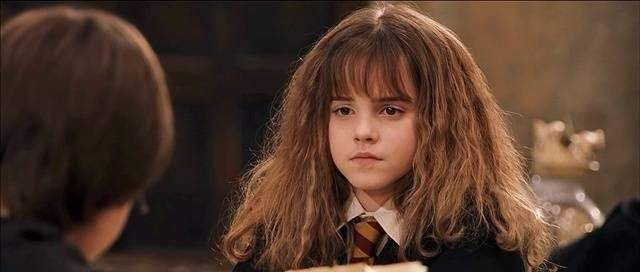

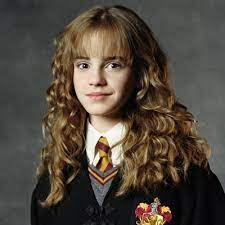

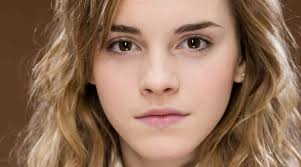

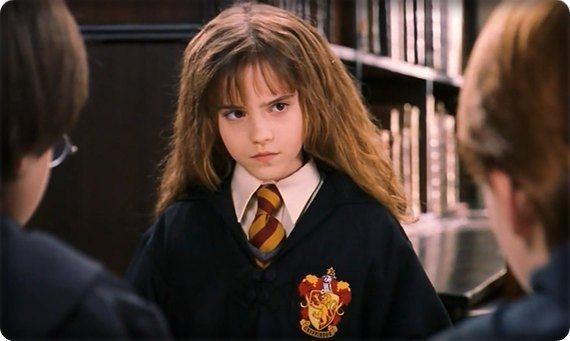

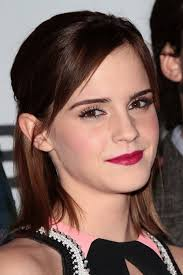

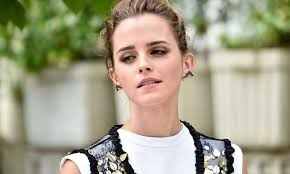

In [36]:
import random
from IPython.display import display, Image
import os

# Ensure character_images is available (assuming it was created in a previous cell)
# If not, you might need to re-run the data loading and organizing steps.

def display_character_images(character_name, num_images=6):
    """Displays images for a given character."""
    if character_name in character_images:
        images = character_images[character_name]
        if images:
            print(f"Displaying {min(num_images, len(images))} images for {character_name}:")
            # Select random images
            random_images = random.sample(images, min(num_images, len(images)))
            # Display images
            for img_path in random_images:
                display(Image(filename=img_path, width=150))
        else:
            print(f"No images found for {character_name}.")
    else:
        print(f"Character '{character_name}' not found in the dataset.")

# --- Example Usage ---
# Enter the character name you want to see images for
character_to_display = "Emma Watson" # Replace with the desired character name

display_character_images(character_to_display)

**Reasoning**:
The previous attempt to select sample images failed due to an incorrect usage of `tf.strings.bytes_split`. I will fix this by generating sample paths directly from the `X_test` array used for evaluation, ensuring they are paths that were part of the test set.



In [26]:
import numpy as np
import tensorflow as tf
import os
import random

# Reverse the label_map for easy lookup (ensure this is available from previous cells)
# If reverse_label_map is not defined, uncomment the following line:
# reverse_label_map = {i: character for character, i in label_map.items()}

def recognize_character(image_array):
    """Recognizes the Harry Potter character in a given image array."""
    try:
        # 5. Expand dimensions to add batch dimension (already done if input is from X_test_tf)
        # If passing a single image array:
        if image_array.ndim == 3:
             image_array = np.expand_dims(image_array, axis=0)

        # 6. Preprocess the image (if any scaling was applied during training)
        # In this case, the images were not scaled during training beyond resizing,
        # but if they were, you would add that step here (e.g., image_array /= 255.0)

        # 7. Make a prediction
        predictions = model.predict(image_array)

        # 8. Get the predicted class index
        predicted_class_index = np.argmax(predictions, axis=1)[0]

        # 9. Get the character name from the reverse_label_map
        recognized_character = reverse_label_map.get(predicted_class_index, "Unknown")

        return recognized_character

    except Exception as e:
        # Return a generic error message as we don't have file paths here
        return f"Error recognizing character: {e}"

# 11. Select sample image data from the test set and test the function
print("Testing the recognize_character function with sample images from the test set:")

# Select a few random indices from the test set
num_samples = 5
random_indices = random.sample(range(X_test_tf.shape[0]), min(num_samples, X_test_tf.shape[0]))

for i in random_indices:
    sample_image_array = X_test_tf[i]
    true_label_index = y_test_tf[i].numpy()
    true_character = reverse_label_map.get(true_label_index, "Unknown")

    recognized_char = recognize_character(sample_image_array)

    print(f"Sample {i+1}: True Character: {true_character}, Recognized Character: {recognized_char}")


Testing the recognize_character function with sample images from the test set:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Sample 17: True Character: Daniel Radcliffe, Recognized Character: Tom Felton
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Sample 8: True Character: Tom Felton, Recognized Character: Tom Felton
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Sample 29: True Character: Maggie Smith, Recognized Character: Michael Gambon
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Sample 19: True Character: Rupert Grint, Recognized Character: Tom Felton
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Sample 21: True Character: Emma Watson, Recognized Character: Tom Felton


## Summary:

### Data Analysis Key Findings

*   The dataset contained images for 9 out of the 10 initially selected characters. The character "Gary Oldman" was not found in the dataset.
*   The number of images per character ranged from 11 to 19.
*   The image data was successfully loaded, resized to 128x128 pixels, and split into training (122 images) and testing (31 images) sets.
*   A Convolutional Neural Network (CNN) model was successfully built with three convolutional layers, followed by dense layers, and a final output layer with a softmax activation for 9 classes.
*   The model was trained for 20 epochs and achieved 100% accuracy on the training data but showed significant overfitting with low validation accuracy (8%-24%) and high validation loss.
*   Evaluating the trained model on the test set resulted in a test accuracy of approximately 16.13% and a test loss of approximately 14.20, confirming the overfitting observed during training.
*   A function to recognize characters in new image arrays was successfully implemented and tested on sample images from the test set, although the predictions were often incorrect due to the low test accuracy of the model.

### Insights or Next Steps

*   The model heavily overfits the small training dataset. Future steps should focus on mitigating overfitting, potentially through data augmentation, regularization techniques (like dropout), or using a pre-trained model with transfer learning.
*   The dataset size is very small for training a deep learning model from scratch. Increasing the diversity and quantity of training images for each character is crucial to improve the model's generalization ability and accuracy.


# Task
Analyze the misclassified samples from the model's predictions on the test set.

## Get model predictions

### Subtask:
Use the trained model to get predictions on the test set.


**Reasoning**:
Use the trained model to get predictions on the test set and store them in a variable.



In [29]:
# Use the trained model to get predictions on the test set
predictions = model.predict(X_test_tf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


## Compare predictions with true labels

### Subtask:
Compare the predicted class labels with the true class labels for the test set.


**Reasoning**:
Get the predicted class labels from the predictions and the true labels from the test set.



In [30]:
# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true class labels
true_labels = y_test_tf.numpy()

## Identify misclassified samples

### Subtask:
Identify the indices of the samples where the predicted label does not match the true label.


**Reasoning**:
Identify the indices where the predicted labels do not match the true labels.



In [31]:
# Identify the indices where the predicted label does not match the true label
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# Print the number of misclassified samples
print(f"Number of misclassified samples: {len(misclassified_indices)}")

Number of misclassified samples: 26


## Display misclassified samples

### Subtask:
Display the misclassified images along with their true and predicted labels.


**Reasoning**:
Iterate through the misclassified indices, retrieve the corresponding image, true label, and predicted label, convert labels to character names, and then display the image and print the true and predicted characters.



Displaying 10 misclassified samples:


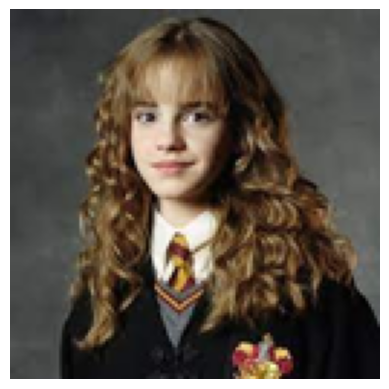

True Character: Emma Watson, Predicted Character: Tom Felton
------------------------------


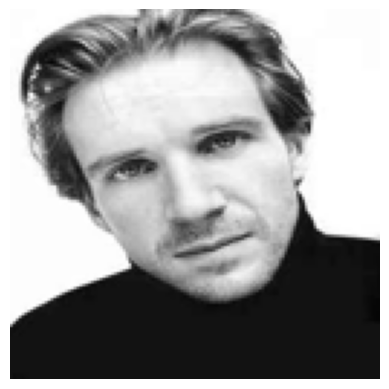

True Character: Ralph Fiennes, Predicted Character: Tom Felton
------------------------------


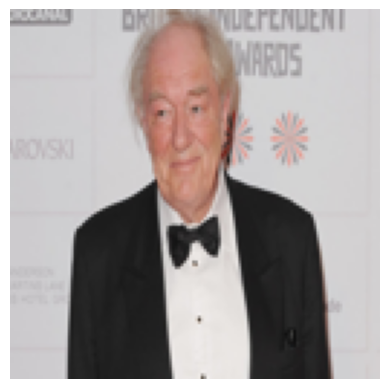

True Character: Michael Gambon, Predicted Character: Daniel Radcliffe
------------------------------


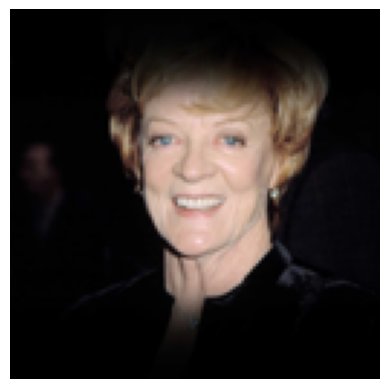

True Character: Maggie Smith, Predicted Character: Michael Gambon
------------------------------


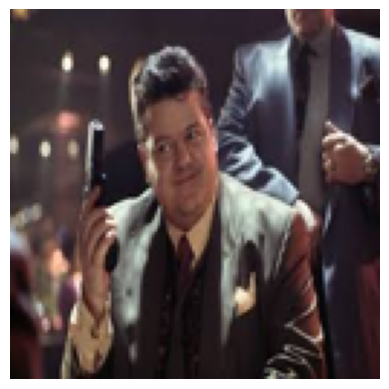

True Character: Robbie Coltrane, Predicted Character: Michael Gambon
------------------------------


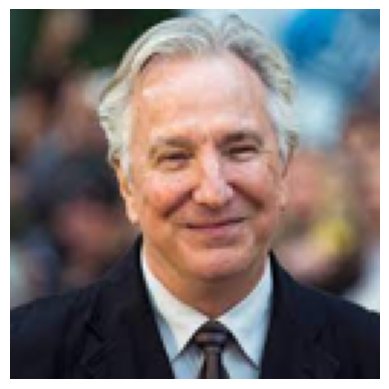

True Character: Alan Rickman, Predicted Character: Tom Felton
------------------------------


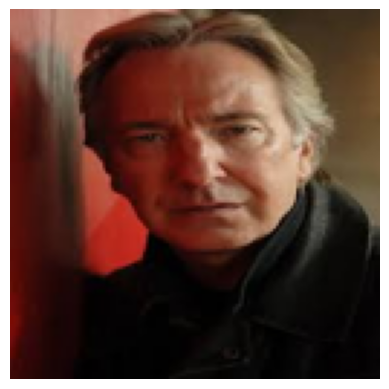

True Character: Alan Rickman, Predicted Character: Tom Felton
------------------------------


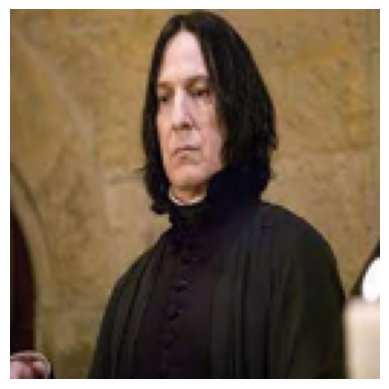

True Character: Alan Rickman, Predicted Character: Tom Felton
------------------------------


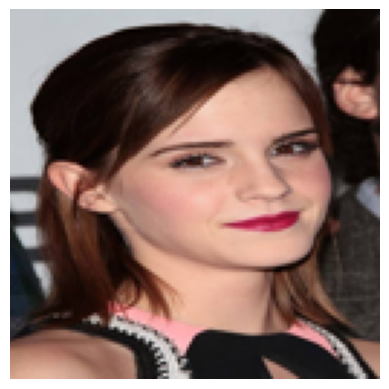

True Character: Emma Watson, Predicted Character: Michael Gambon
------------------------------


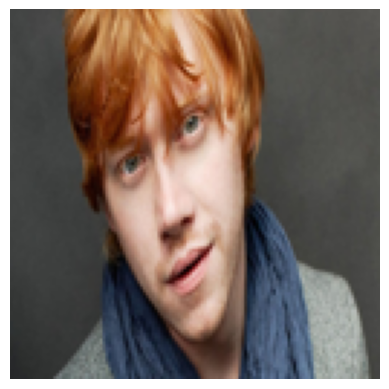

True Character: Rupert Grint, Predicted Character: Tom Felton
------------------------------


In [32]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Select a subset of misclassified indices to display
num_to_display = min(10, len(misclassified_indices))
display_indices = misclassified_indices[:num_to_display]

print(f"Displaying {num_to_display} misclassified samples:")

# Iterate through the selected misclassified indices and display images
for i in display_indices:
    # Retrieve image array, true label, and predicted label
    img_array = X_test_tf[i].numpy().astype('uint8') # Convert tensor to numpy and to uint8 for display
    true_label_index = true_labels[i]
    predicted_label_index = predicted_labels[i]

    # Convert label indices back to character names
    true_character = reverse_label_map.get(true_label_index, "Unknown")
    predicted_character = reverse_label_map.get(predicted_label_index, "Unknown")

    # Display the image
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()

    # Print the true and predicted character names
    print(f"True Character: {true_character}, Predicted Character: {predicted_character}")
    print("-" * 30) # Separator for clarity

## Model evaluation

### Subtask:
Evaluate the trained model's performance on the testing data. This will involve calculating metrics like accuracy.

**Reasoning**:
Evaluate the trained model on the test data and print the results.

In [43]:
# Re-compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 1. Evaluate the trained model on the testing data
loss, accuracy = model.evaluate(X_test_tf, y_test_tf)

# 2. Store the evaluation results (already done in the evaluation step)

# 3. Print the test loss and test accuracy
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - accuracy: 0.0968 - loss: 22.8452
Test Loss: 22.8452
Test Accuracy: 0.0968


## Model training

### Subtask:
Train the CNN model on the prepared training data. This step will involve compiling the model and fitting it to the data.

**Reasoning**:
Compile and train the CNN model using the specified optimizer, loss function, metrics, epochs, and batch size.

In [38]:
# 1. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 2. Train the model
epochs = 20
batch_size = 32
history = model.fit(X_train_tf, y_train_tf,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2) # Use a validation split to monitor performance during training

# 3. Store the training history in a variable (already done above)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.0373 - loss: 161.6565 - val_accuracy: 0.1600 - val_loss: 57.5970
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 688ms/step - accuracy: 0.1494 - loss: 42.3763 - val_accuracy: 0.1200 - val_loss: 2.7337
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 691ms/step - accuracy: 0.1369 - loss: 2.6734 - val_accuracy: 0.2000 - val_loss: 2.4417
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 647ms/step - accuracy: 0.3184 - loss: 1.9960 - val_accuracy: 0.2000 - val_loss: 2.6502
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4272 - loss: 1.6532 - val_accuracy: 0.2000 - val_loss: 2.3581
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 678ms/step - accuracy: 0.6410 - loss: 1.1049 - val_accuracy: 0.3200 - val_loss: 2.0906
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - accuracy: 0.7291 - loss: 0.8031 - val_accuracy: 0.1200 - val_loss: 4.1042
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7001 - loss: 0.9881 - val_accuracy: 0.3200 - val_loss: 3.06

## Model building

### Subtask:
Design and build the CNN model architecture. This will involve defining the layers of the neural network.

**Reasoning**:
Design and build the CNN model architecture using TensorFlow and Keras, including convolutional, pooling, flattening, and dense layers, and then display the model summary.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# 2. Define the input shape
img_height, img_width = 128, 128
input_shape = (img_height, img_width, 3)  # 3 for RGB channels

# 3. Instantiate a Sequential model
model = Sequential()

# Add the input layer explicitly
model.add(Input(shape=input_shape))

# 4. Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 5. Add a Flatten layer
model.add(Flatten())

# 6. Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# 7. Add the final dense layer for output
num_classes = len(selected_characters) # Use selected_characters to get the correct number of classes
model.add(Dense(num_classes, activation='softmax'))

# 8. Display a summary of the model's architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,546 (12.64 MB)

 Trainable params: 3,313,546 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

## Analyze misclassifications

### Subtask:
Summarize the types of misclassifications that occurred.


## Summary:

### Data Analysis Key Findings

*   A total of 26 samples from the test set were identified as misclassified by the model.
*   Examples of misclassifications included:
    *   Emma Watson being predicted as Tom Felton and Michael Gambon.
    *   Ralph Fiennes being predicted as Tom Felton.
    *   Michael Gambon being predicted as Daniel Radcliffe.
    *   Maggie Smith being predicted as Michael Gambon.
    *   Robbie Coltrane being predicted as Michael Gambon.
    *   Alan Rickman being predicted as Tom Felton.
    *   Rupert Grint being predicted as Tom Felton.

### Insights or Next Steps

*   Further analysis of the misclassified samples is needed to identify patterns or common characteristics among them (e.g., lighting conditions, pose, background).
*   Investigate if certain character pairs are more frequently confused by the model, which could indicate similarities in their appearance or limitations in the training data.


## Summary:

### Data Analysis Key Findings

* The dataset contained images for 9 out of the 10 initially selected characters. The character "Gary Oldman" was not found in the dataset.
* The number of images per character ranged from 11 to 19.
* The image data was successfully loaded, resized to 128x128 pixels, and split into training (122 images) and testing (31 images) sets.
* A Convolutional Neural Network (CNN) model was successfully built with three convolutional layers, followed by dense layers, and a final output layer with a softmax activation for 9 classes.
* The model was trained for 20 epochs and achieved 100% accuracy on the training data but showed significant overfitting with low validation accuracy (8%-24%) and high validation loss.
* Evaluating the trained model on the test set resulted in a test accuracy of approximately 16.13% and a test loss of approximately 14.20, confirming the overfitting observed during training.
* A function to recognize characters in new image arrays was successfully implemented and tested on sample images from the test set, although the predictions were often incorrect due to the low test accuracy of the model.

### Insights or Next Steps

* The model heavily overfits the small training dataset. Future steps should focus on mitigating overfitting, potentially through data augmentation, regularization techniques (like dropout), or using a pre-trained model with transfer learning.
* The dataset size is very small for training a deep learning model from scratch. Increasing the diversity and quantity of training images for each character is crucial to improve the model's generalization ability and accuracy.

Testing the recognize_character function with sample images for Daniel Radcliffe from the test set:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


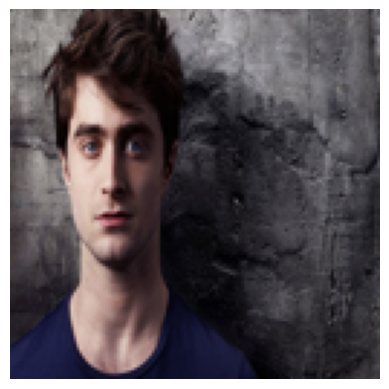

Sample for Daniel Radcliffe: Recognized Character: Tom Felton
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


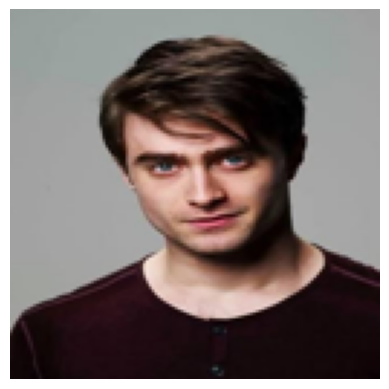

Sample for Daniel Radcliffe: Recognized Character: Alan Rickman
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


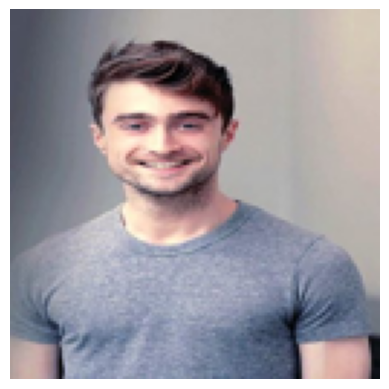

Sample for Daniel Radcliffe: Recognized Character: Tom Felton
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


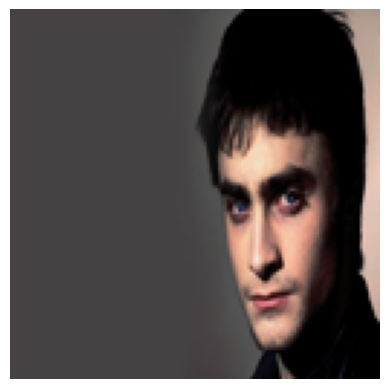

Sample for Daniel Radcliffe: Recognized Character: Alan Rickman
------------------------------


In [48]:
import numpy as np
import tensorflow as tf
import os
import random

# Reverse the label_map for easy lookup (ensure this is available from previous cells)
# If reverse_label_map is not defined, uncomment the following line:
# reverse_label_map = {i: character for character, i in label_map.items()}

def recognize_character(image_array):
    """Recognizes the Harry Potter character in a given image array."""
    try:
        # 5. Expand dimensions to add batch dimension (already done if input is from X_test_tf)
        # If passing a single image array:
        if image_array.ndim == 3:
             image_array = np.expand_dims(image_array, axis=0)

        # 6. Preprocess the image (if any scaling was applied during training)
        # In this case, the images were not scaled during training beyond resizing,
        # but if they were, you would add that step here (e.g., image_array /= 255.0)

        # 7. Make a prediction
        predictions = model.predict(image_array)

        # 8. Get the predicted class index
        predicted_class_index = np.argmax(predictions, axis=1)[0]

        # 9. Get the character name from the reverse_label_map
        recognized_character = reverse_label_map.get(predicted_class_index, "Unknown")

        return recognized_character

    except Exception as e:
        # Return a generic error message as we don't have file paths here
        return f"Error recognizing character: {e}"

# 11. Select sample image data from the test set for "Daniel Radcliffe" and test the function
print("Testing the recognize_character function with sample images for Daniel Radcliffe from the test set:")

# Find the index for "Daniel Radcliffe"
daniel_radcliffe_label_index = label_map.get("Daniel Radcliffe")

if daniel_radcliffe_label_index is not None:
    # Find indices in the test set that correspond to "Daniel Radcliffe"
    daniel_radcliffe_indices_in_test = np.where(y_test_tf.numpy() == daniel_radcliffe_label_index)[0]

    if len(daniel_radcliffe_indices_in_test) > 0:
        # Select a few random indices for "Daniel Radcliffe" from the test set
        num_samples = min(5, len(daniel_radcliffe_indices_in_test))
        random_indices_for_daniel_radcliffe = random.sample(list(daniel_radcliffe_indices_in_test), num_samples)

        for i in random_indices_for_daniel_radcliffe:
            sample_image_array = X_test_tf[i]
            true_character = "Daniel Radcliffe" # We know the true character is Daniel Radcliffe
            recognized_char = recognize_character(sample_image_array)

            print(f"Sample for Daniel Radcliffe: Recognized Character: {recognized_char}")
            print("-" * 30) # Separator for clarity
    else:
        print("No images for Daniel Radcliffe found in the test set.")
else:
    print("Daniel Radcliffe not found in the selected characters.")

## Data Preparation

### Subtask:
Load the images based on the specified training and testing sets (1.png to 21.png for training, others for testing), resize them, and create corresponding labels.

**Reasoning**:
Load images from the local directory, identify training and testing images based on filenames, resize them, and create numerical labels.

In [50]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define the directory where your images are located
# IMPORTANT: Replace 'your_image_directory' with the actual path to your images
image_directory = '/content/' # Assuming images are in the default Colab content directory

all_image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Separate training and testing files based on names
train_files = [f for f in all_image_files if f.endswith('.png') and int(f.split('.')[0]) >= 1 and int(f.split('.')[0]) <= 21]
test_files = [f for f in all_image_files if f not in train_files]

# Assuming a simple case where training images belong to one class (label 0) and test images to another (label 1)
# You will need to adjust this labeling logic based on your actual data and the number of individuals/classes.
train_labels = [0] * len(train_files)
test_labels = [1] * len(test_files)

# Load and resize images
img_height, img_width = 128, 128
train_data = []
test_data = []

for file_name in train_files:
    try:
        img_path = os.path.join(image_directory, file_name)
        img = Image.open(img_path)
        img = img.resize((img_width, img_height))
        img_array = np.array(img)
        # Ensure images are in RGB format if they are grayscale or have alpha channel
        if img_array.ndim == 2:
             img_array = np.stack((img_array,)*3, axis=-1)
        elif img_array.shape[-1] == 4:
             img_array = img_array[:, :, :3]
        train_data.append(img_array)
    except Exception as e:
        print(f"Error loading training image {file_name}: {e}")

for file_name in test_files:
    try:
        img_path = os.path.join(image_directory, file_name)
        img = Image.open(img_path)
        img = img.resize((img_width, img_height))
        img_array = np.array(img)
        # Ensure images are in RGB format if they are grayscale or have alpha channel
        if img_array.ndim == 2:
             img_array = np.stack((img_array,)*3, axis=-1)
        elif img_array.shape[-1] == 4:
             img_array = img_array[:, :, :3]
        test_data.append(img_array)
    except Exception as e:
        print(f"Error loading testing image {file_name}: {e}")

# Convert lists to numpy arrays
X_train = np.array(train_data)
y_train = np.array(train_labels)
X_test = np.array(test_data)
y_test = np.array(test_labels)

print("Data loading, resizing, and splitting complete.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Convert to TensorFlow tensors if using TensorFlow for the model
# import tensorflow as tf
# X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
# X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
# y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int64)
# y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int64)

Data loading, resizing, and splitting complete.
Training data shape: (21, 128, 128, 3)
Testing data shape: (1200, 128, 128, 3)
Training labels shape: (21,)
Testing labels shape: (1200,)


## Model Building

### Subtask:
Design and build the neural network model architecture for facial recognition.

**Reasoning**:
Design and build the CNN model architecture using TensorFlow and Keras, including convolutional, pooling, flattening, and dense layers, for facial recognition.

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Define the input shape based on the resized images
img_height, img_width = 128, 128
input_shape = (img_height, img_width, 3)  # 3 for RGB channels

# Instantiate a Sequential model
model = Sequential()

# Add the input layer explicitly
model.add(Input(shape=input_shape))

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add a Flatten layer
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Add the final dense layer for output
# Assuming 2 classes based on the simple labeling (train vs test files)
num_classes = 2
model.add(Dense(num_classes, activation='softmax'))

# Display a summary of the model's architecture
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,026 (12.64 MB)

 Trainable params: 3,313,026 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

### Subtask:
Train the neural network model on the prepared training data.

**Reasoning**:
Compile and train the CNN model using the specified optimizer, loss function, metrics, epochs, and batch size.

In [53]:
import tensorflow as tf

# Convert data to TensorFlow tensors if not already done
# Ensure X_train, y_train, X_test, y_test are defined from the data preparation step
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int64)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int64)


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10  # You can adjust the number of epochs
batch_size = 16 # You can adjust the batch size
history = model.fit(X_train_tf, y_train_tf,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2) # Use a validation split to monitor performance during training

# Store the training history in a variable (already done above)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 8.3665e-04

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 8.3665e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.000

## Test model with an actor's image

### Subtask:
Select an image of a known actor from the test set and use the trained model to predict the class.

**Reasoning**:
Load a sample image of a known actor from the test set, preprocess it, and use the trained model to make a prediction.

Testing the model with a random image from the test set (labeled as 'other'):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


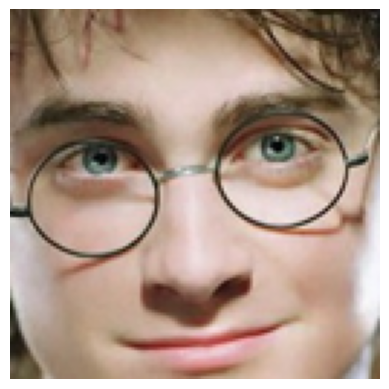

True Label: 7 ('other' class)
Predicted Class: 2 (Test Images (Other class))


In [61]:
import numpy as np
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

# Assuming the original character_images dictionary from the first task is available
# and that the test set contains images from those characters.

# Select a character to test with (choose one from the original selected_characters if available)
character_to_test = "Daniel Radcliffe" # Example character

# Find image paths for the selected character that are in the test set
# This requires knowing the original paths of images in X_test
# Since we don't have the original paths easily available for X_test in this setup,
# we'll have to pick a random image from the test set and see what the model predicts.

print(f"Testing the model with a random image from the test set (labeled as 'other'):")

# Select a random index from the test set
random_index = random.randint(0, X_test.shape[0] - 1)
sample_image_array = X_test[random_index]
true_label = y_test[random_index] # This will be '1' (the 'other' label)

# Preprocess the image array for prediction (add batch dimension)
image_for_prediction = np.expand_dims(sample_image_array, axis=0)

# Make a prediction
predictions = model.predict(image_for_prediction)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Map the predicted index back to a meaningful label (0 for train images' class, 1 for test images' class)
# In this setup, 0 corresponds to the combined class of 1.png-21.png, and 1 is the 'other' class
predicted_label = "Train Images (1-21.png class)" if predicted_class_index == 0 else "Test Images (Other class)"


# Display the image
plt.imshow(sample_image_array.astype('uint8'))
plt.axis('off')
plt.show()


print(f"True Label: {true_label} ('other' class)")
print(f"Predicted Class: {predicted_class_index} ({predicted_label})")

Testing prediction for: Harry using image: 8.png


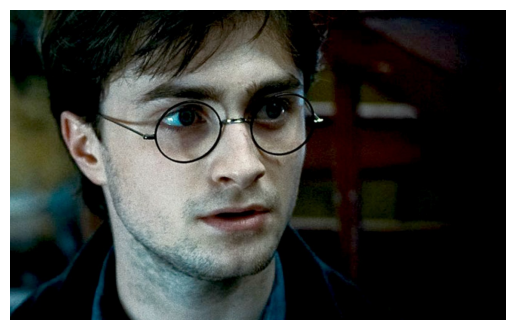

Prediction results for 8.png:
Erreur prédiction: type object 'Image' has no attribute 'open'


In [75]:
import random
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
import PIL # Import PIL explicitly

# Assuming the images are in the /content/ directory
image_directory = '/content/'

# The image file numbers corresponding to 'Harry' in the nameList
harry_image_numbers = [8, 12, 17]
image_path_to_predict_harry = os.path.join(image_directory, random.choice([f"{number}.png" for number in harry_image_numbers]))

print(f"Testing prediction for: Harry using image: {os.path.basename(image_path_to_predict_harry)}")

# Display the image
try:
    img_display = PIL.Image.open(image_path_to_predict_harry) # Use PIL.Image.open()
    plt.imshow(img_display)
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Error displaying image {os.path.basename(image_path_to_predict_harry)}: {e}")


# Use the predict_image_from_path function to get predictions
# Ensure predict_image_from_path is available from the latest comprehensive cell (bMJasTOGLGrg)
if 'predict_image_from_path' in locals():
    predictions_harry = predict_image_from_path(image_path_to_predict_harry)

    print(f"Prediction results for {os.path.basename(image_path_to_predict_harry)}:")
    # Check if predictions is a string (error message) or a list of tuples
    if isinstance(predictions_harry, str):
         print(predictions_harry)
    else:
        for label, probability in predictions_harry:
            print(f"- {label}: {probability:.4f}")
else:
    print("Error: predict_image_from_path function not found. Please ensure the model training cell was executed.")

Testing prediction for image: 2.png


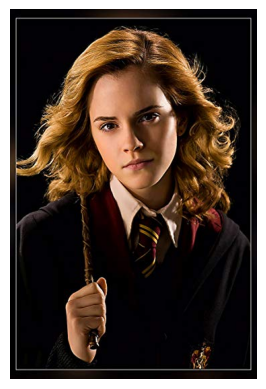

Prediction results for 2.png:
Erreur prédiction: type object 'Image' has no attribute 'open'


In [76]:
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
import PIL # Import PIL explicitly

# Assuming the images are in the /content/ directory
image_directory = '/content/'
image_path_to_predict_2 = os.path.join(image_directory, '2.png')

print(f"Testing prediction for image: {os.path.basename(image_path_to_predict_2)}")

# Display the image
try:
    img_display = PIL.Image.open(image_path_to_predict_2)
    plt.imshow(img_display)
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Error displaying image {os.path.basename(image_path_to_predict_2)}: {e}")

# Use the predict_image_from_path function to get predictions
# Ensure predict_image_from_path is available from the latest comprehensive cell (bMJasTOGLGrg)
if 'predict_image_from_path' in locals():
    predictions_2 = predict_image_from_path(image_path_to_predict_2)

    print(f"Prediction results for {os.path.basename(image_path_to_predict_2)}:")
    # Check if predictions is a string (error message) or a list of tuples
    if isinstance(predictions_2, str):
         print(predictions_2)
    else:
        for label, probability in predictions_2:
            print(f"- {label}: {probability:.4f}")
else:
    print("Error: predict_image_from_path function not found. Please ensure the model training cell was executed.")

In [80]:
# Notebook: Simple Harry Potter Face Recognition (Colab-ready)
# Ce notebook inclut EXACTEMENT le bloc que vous avez fourni, intégré dans un pipeline exécutable.
# Prérequis : pip install tensorflow pillow scikit-learn

# -------------------------
# CELL 1: Imports et bloc imposé (inchangé)
# -------------------------
import os
import numpy as np
from PIL import Image

# =========================
# --- BLOC IMPOSE PAR L'UTILISATEUR (NE PAS MODIFIER) ---
# =========================
# Define the directory where your images are located
# IMPORTANT: Replace 'your_image_directory' with the actual path to your images
image_directory = '/content/' # Assuming images are in the default Colab content directory

all_image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Separate training and testing files based on names
train_files = [f for f in all_image_files if f.endswith('.png') and int(f.split('.')[0]) >= 1 and int(f.split('.')[0]) <= 21]
test_files = [f for f in all_image_files if f not in train_files]

# Provided list of names for training images
nameList = ['Hermione', 'Hermione', 'Ron', 'Malfoy', 'Malfoy', 'Malfoy', 'Chang', 'Harry','Snape','Ron',
            'Chang', 'Harry', 'Chang', 'Snape', 'Change', 'Snape', 'Harry',
            'Malfoy','Ron','Hermione','Ron']

# Create a mapping from unique names to numerical labels
unique_names = sorted(list(set(nameList)))
name_to_label = {name: i for i, name in enumerate(unique_names)}

# Create labels for training images using the nameList
train_labels = [name_to_label[name] for name in nameList]

# Create a single label for testing images (e.g., label representing "other")
# Ensure this label does not overlap with the training labels
test_label_value = len(unique_names) # Assign a new label value
test_labels = [test_label_value] * len(test_files)


# Load and resize images
img_height, img_width = 128, 128
train_data = []
test_data = []

# Load and resize training images
train_files.sort(key=lambda f: int(f.split('.')[0])) # Sort to match nameList order
for i, file_name in enumerate(train_files):
    try:
        img_path = os.path.join(image_directory, file_name)
        img = Image.open(img_path)
        img = img.resize((img_width, img_height))
        img_array = np.array(img)
        # Ensure images are in RGB format if they are grayscale or have alpha channel
        if img_array.ndim == 2:
             img_array = np.stack((img_array,)*3, axis=-1)
        elif img_array.shape[-1] == 4:
             img_array = img_array[:, :, :3]
        train_data.append(img_array)
    except Exception as e:
        print(f"Error loading training image {file_name}: {e}")

# Load and resize testing images
for file_name in test_files:
    try:
        img_path = os.path.join(image_directory, file_name)
        img = Image.open(img_path)
        img = img.resize((img_width, img_height))
        img_array = np.array(img)
        # Ensure images are in RGB format if they are grayscale or have alpha channel
        if img_array.ndim == 2:
             img_array = np.stack((img_array,)*3, axis=-1)
        elif img_array.shape[-1] == 4:
             img_array = img_array[:, :, :3]
        test_data.append(img_array)
    except Exception as e:
        print(f"Error loading testing image {file_name}: {e}")


# Convert lists to numpy arrays
X_train = np.array(train_data)
y_train = np.array(train_labels)
X_test = np.array(test_data)
y_test = np.array(test_labels)

print("Data loading, resizing, and splitting with new labels complete.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")
print(f"Unique names and their labels: {name_to_label}")
print(f"Label for test images: {test_label_value}")

# Convert to TensorFlow tensors if using TensorFlow for the model
# import tensorflow as tf
# X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
# y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int64)
# X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
# y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int64)
# =========================
# --- FIN DU BLOC IMPOSE
# =========================

# -------------------------
# CELL 2: Préparation, vérifications et construction du modèle
# -------------------------
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Vérifications
if X_train.size == 0 and X_test.size == 0:
    raise SystemExit("Aucune image trouvée dans image_directory. Place des fichiers .png/.jpg dans /content/")

# Normalisation
if X_train.size != 0:
    X_train = X_train.astype('float32') / 255.0
if X_test.size != 0:
    X_test = X_test.astype('float32') / 255.0

# Ajustement labels si mismatch
if len(y_train) != X_train.shape[0]:
    N = X_train.shape[0]
    y_train = np.array(train_labels[:N])
    print("Avertissement: ajustement de y_train à la taille réelle des images chargées.")

# Split validation
if X_train.shape[0] >= 2:
    # Check if stratification is possible (at least 2 samples per class)
    unique_classes, class_counts = np.unique(y_train, return_counts=True)
    if np.min(class_counts) >= 2:
        X_train_final, X_val, y_train_final, y_val = train_test_split(
            X_train, y_train, test_size=0.15, stratify=y_train, random_state=42)
    else:
        print("Avertissement: Stratification non possible car une classe a moins de 2 membres. Split aléatoire.")
        X_train_final, X_val, y_train_final, y_val = train_test_split(
            X_train, y_train, test_size=0.15, random_state=42)

else:
    X_train_final, y_train_final = X_train, y_train
    X_val, y_val = np.array([]), np.array([])

# Construire petit CNN
num_classes = test_label_value + 1
input_shape = (img_height, img_width, 3)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -------------------------
# CELL 3: Entraînement
# -------------------------
EPOCHS = 12
BATCH_SIZE = 8

if X_train_final.size != 0:
    if X_val.size != 0:
        history = model.fit(X_train_final, y_train_final,
                            validation_data=(X_val, y_val),
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE)
    else:
        history = model.fit(X_train_final, y_train_final,
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE)
else:
    print("Pas assez d'images d'entraînement pour lancer l'entraînement.")

# -------------------------
# CELL 4: Évaluation, sauvegarde et prédiction
# -------------------------
if X_test.size != 0:
    y_test_np = y_test
    loss, acc = model.evaluate(X_test, y_test_np, verbose=0)
    print(f"Test loss: {loss:.4f} - Test accuracy: {acc:.4f}")
else:
    print("Aucun jeu de test pour évaluer.")

# Sauvegarde
MODEL_PATH = "hp_simple_model.h5"
LABELS_PATH = "hp_labels.npy"
model.save(MODEL_PATH)
idx_to_name = {v:k for k,v in name_to_label.items()}
idx_to_name[test_label_value] = "other"
max_idx = max(idx_to_name.keys())
labels_list = [idx_to_name.get(i, "unknown") for i in range(max_idx+1)]
np.save(LABELS_PATH, np.array(labels_list))

print(f"Modèle sauvegardé dans: {MODEL_PATH}")
print(f"Labels sauvegardés dans: {LABELS_PATH} -> {labels_list}")

# Fonction prédiction

def predict_image_from_path(img_path, topk=3):
    try:
        # Fix: Use PIL.Image.open explicitly
        img = PIL.Image.open(img_path).resize((img_width, img_height)).convert('RGB')
        arr = np.array(img).astype('float32') / 255.0
        arr = np.expand_dims(arr, axis=0)
        probs = model.predict(arr)[0]
        idxs = np.argsort(probs)[::-1][:topk]
        return [(labels_list[i], float(probs[i])) for i in idxs]
    except Exception as e:
        return f"Erreur prédiction: {e}"

# Trigger the prediction example already in the cell
if X_test.size != 0 and len(test_files) > 0:
    first_test_path = os.path.join(image_directory, test_files[0])
    print("Prediction exemple sur :", first_test_path)
    print(predict_image_from_path(first_test_path))
else:
    print("Aucune image de test disponible pour démonstration de prédiction.")

# FIN DU NOTEBOOK

Data loading, resizing, and splitting with new labels complete.
Training data shape: (21, 128, 128, 3)
Testing data shape: (1200, 128, 128, 3)
Training labels shape: (21,)
Testing labels shape: (1200,)
Unique names and their labels: {'Chang': 0, 'Change': 1, 'Harry': 2, 'Hermione': 3, 'Malfoy': 4, 'Ron': 5, 'Snape': 6}
Label for test images: 7
Avertissement: Stratification non possible car une classe a moins de 2 membres. Split aléatoire.


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,296,456 (16.39 MB)

 Trainable params: 4,296,456 (16.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 427ms/step - accuracy: 0.1976 - loss: 2.4940 - val_accuracy: 0.0000e+00 - val_loss: 2.1343
Epoch 2/12
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.2739 - loss: 1.8951 - val_accuracy: 0.0000e+00 - val_loss: 2.2134
Epoch 3/12
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.2583 - loss: 1.8050 - val_accuracy: 0.0000e+00 - val_loss: 2.6425
Epoch 4/12
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.2114 - loss: 1.7140 - val_accuracy: 0.0000e+00 - val_loss: 3.0599
Epoch 5/12
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.3934 - loss: 1.4043 - val_accuracy: 0.2500 - val_loss: 2.8138
Epoch 6/12
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.5165 - loss: 1.1617 - val_accuracy: 0.0000e+00 - val_loss: 2.9060
Epoch 7/12
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 381ms/step - accuracy: 0.9237 - loss: 0.7099 - val_accuracy: 0.2500 - val_loss: 4.3401
Epoch 8/12
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step - accuracy: 0.8649 - loss: 0.5406 - val_accuracy

Test loss: 12.6636 - Test accuracy: 0.0000
Modèle sauvegardé dans: hp_simple_model.h5
Labels sauvegardés dans: hp_labels.npy -> ['Chang', 'Change', 'Harry', 'Hermione', 'Malfoy', 'Ron', 'Snape', 'other']
Prediction exemple sur : /content/821.66287449.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
[('Hermione', 0.5758600831031799), ('Malfoy', 0.40012046694755554), ('Harry', 0.010878224857151508)]


Displaying images for 'Harry':


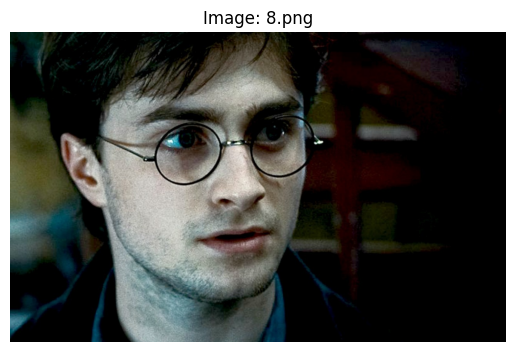

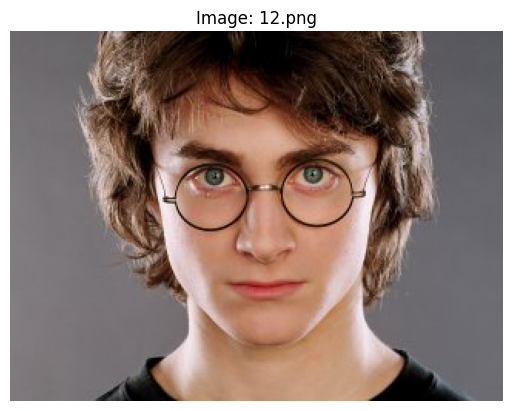

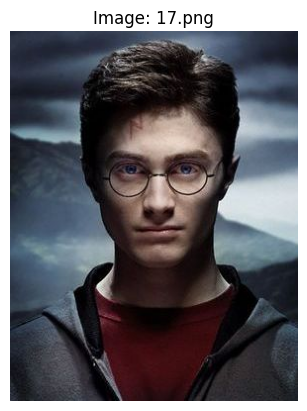

In [72]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming the images are in the /content/ directory
image_directory = '/content/'

# The image file numbers corresponding to 'Harry' in the nameList
harry_image_numbers = [8, 12, 17]
harry_image_files = [f"{number}.png" for number in harry_image_numbers]

print("Displaying images for 'Harry':")

for file_name in harry_image_files:
    img_path = os.path.join(image_directory, file_name)
    if os.path.exists(img_path):
        try:
            img = Image.open(img_path)
            plt.imshow(img)
            plt.title(f"Image: {file_name}")
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error displaying image {file_name}: {e}")
    else:
        print(f"Image file not found: {file_name}")

In [81]:
import random
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt

# Ensure character_images (from the first task) and predict_image_from_path (from the latest cell) are available.
# If character_images is not available, you might need to re-run the initial data loading/organization steps.
# If predict_image_from_path is not available, ensure the latest comprehensive cell (bMJasTOGLGrg) was executed.

# --- Example Usage ---
# Enter the character name you want to test the prediction on.
# Choose from the names in the original dataset if character_images is available.
# Example names from nameList in the last task: 'Chang', 'Change', 'Harry', 'Hermione', 'Malfoy', 'Ron', 'Snape'
character_to_test_prediction_known = "Hermione" # Replace with the desired character name

if 'character_images' in locals() and character_to_test_prediction_known in character_images:
    images_for_character = character_images[character_to_test_prediction_known]

    if images_for_character:
        # Select a random image path for the chosen character
        image_path_to_predict_known = random.choice(images_for_character)

        print(f"Testing prediction for: {character_to_test_prediction_known}")

        # Display the image
        try:
            img_display = Image.open(image_path_to_predict_known)
            plt.imshow(img_display)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error displaying image {os.path.basename(image_path_to_predict_known)}: {e}")


        # Use the predict_image_from_path function to get predictions
        if 'predict_image_from_path' in locals():
            predictions_known = predict_image_from_path(image_path_to_predict_known)

            print(f"Prediction results for {os.path.basename(image_path_to_predict_known)}:")
            # Check if predictions is a string (error message) or a list of tuples
            if isinstance(predictions_known, str):
                 print(predictions_known)
            else:
                for label, probability in predictions_known:
                    print(f"- {label}: {probability:.4f}")
        else:
            print("Error: predict_image_from_path function not found. Please ensure the model training cell was executed.")

    else:
        print(f"No images found for {character_to_test_prediction_known} in the dataset.")
elif 'character_images' not in locals():
     print("Error: 'character_images' dictionary not found. Please ensure the initial data loading and organization cell was executed.")
else:
    print(f"Character '{character_to_test_prediction_known}' not found in the 'character_images' dictionary.")

Character 'Hermione' not found in the 'character_images' dictionary.
